# **<ins>Binning</ins>**
**Type of Content** : Documentation

**Domain** : Machine Learning

**Module** : Feature Engineering and Performance Metrices

Binning is a data smoothing technique which smooths out noise and is generally used to increase the accuracy and to create new features. Binning methods smooth a sorted data value by consulting its <i>neighborhood</i> (the values around it).<br>
In this method the data is first sorted and then the sorted values are placed into a number of buckets or bins. As the technique consults the neighborhood of values, it performs local smoothing and is widely used in Feature Engineering.
<br> <img src="https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/media/aml-quantizationexample.png" style="width:70%">

## Types of Binning
1. <b>Fixed-Width binning </b>: Here, we manually create fix width bins on the basis of some rules and domain knowledge.
2. <b>Adaptive Binning</b>: Here, the data distribution itself decides bin ranges for itself. No manual intervention is required. So, the bins which are created are uniform in terms of number of data points in it.

## *Fixed-Width Binning* 
We will create a pandas DataFrame assigned to the ```ages``` with only 1 column which contains 10 randomly generated values from 21 to 61.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spstats

### Generating random values and storing in pandas dataframe 

In [2]:
df_ages = pd.DataFrame({'age': np.random.randint(21, 61, 10)})
df_ages

,age
0,24
1,59
2,56
3,57
4,39
5,31
6,35
7,51
8,35
9,55


### Create new column of ```age_bins``` via Defining Bin edges 
The left bin edge will be exclusive and the right bin edge will be inclusive.

In [3]:
df_ages['age_bins'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49, 59])
df_ages

,age,age_bins
0,24,"(20, 29]"
1,59,"(49, 59]"
2,56,"(49, 59]"
3,57,"(49, 59]"
4,39,"(29, 39]"
5,31,"(29, 39]"
6,35,"(29, 39]"
7,51,"(49, 59]"
8,35,"(29, 39]"
9,55,"(49, 59]"


In [4]:
#verify the age_bins values are unique
df_ages['age_bins'].unique()

[(20, 29], (49, 59], (29, 39]]
Categories (3, interval[int64]): [(20, 29] < (29, 39] < (49, 59]]

### creating new column ```age_by_decade``` with the labels 

In [5]:
df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49, 59], labels=['20s', '30s', '40s', '50s'])
df_ages

,age,age_bins,age_by_decade
0,24,"(20, 29]",20s
1,59,"(49, 59]",50s
2,56,"(49, 59]",50s
3,57,"(49, 59]",50s
4,39,"(29, 39]",30s
5,31,"(29, 39]",30s
6,35,"(29, 39]",30s
7,51,"(49, 59]",50s
8,35,"(29, 39]",30s
9,55,"(49, 59]",50s


We have created a new feature of <b>age_by_decade</b> from data containing ages by fixed-width binning which would prove helpful in large dataframes.
<br>
The drawback in using fixed-width binning is that due to us manually deciding the bin ranges, we can end up with irregular bins which are not uniform based on the number of data points or values which fall in each bin. Some of the bins might be densely populated and some of them might be sparsely populated or even empty. In such cases, adaptive binning is better method in which data distribution is used to decide the bin ranges.

## *Adaptive Binning*
Here, the bins are positioned adaptively based on the distribution of the data. In this approach, we use the data distribution itself to decide what should be the appropriate bins. This can be done using the quantiles of the distribution.
Quantile based binning is a good strategy to use for adaptive binning.<br>
Quantiles are values that divide the data into equal portions. The quartiles divide the data into quarters, the deciles into tenths, etc.
<br>
Thus, q-Quantiles help in partitioning a numeric attribute into q equal partitions. Here, we will use for 4-Quantiles <b>(quartiles)</b> for partitioning.

In [6]:
fcc_df= pd.read_csv('fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


In [7]:
#taking quartiles for binning
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

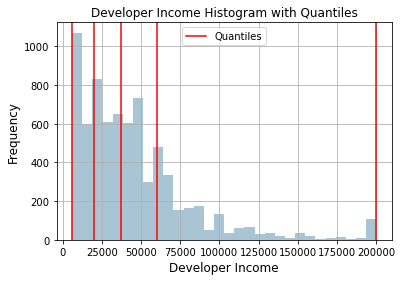

In [8]:
fig, ax = plt.subplots()
fcc_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

The above graph depicts a right skew in the income with lesser developers earning more money and vice-versa. The red lines depict the quartile values and our potential bins. We will apply quartiles as obtained from above graph in the binning process.

In [9]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_df['Income_quantile_range'] = pd.qcut(fcc_df['Income'], q=quantile_list)
fcc_df['Income_quantile_label'] = pd.qcut(fcc_df['Income'], q=quantile_list, labels=quantile_labels)
fcc_df[['ID.x', 'Age', 'Income', 'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


The resultant outcome of binning leads to discrete valued categorical features, so we will have to perform log transform to create monotonic data transformations. Their main significance is that they help in stabilizing variance, adhering closely to the normal distribution and making the data independent of the mean based on its distribution.
### Log Transform

In [10]:
#log transform on Income values
fcc_df['Income_log'] = np.log((1+ fcc_df['Income']))
fcc_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

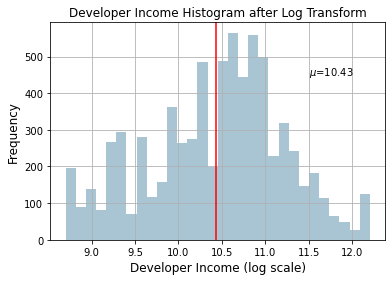

In [11]:
income_log_mean = np.round(np.mean(fcc_df['Income_log']), 2)

#data visualization
fig, ax = plt.subplots()
fcc_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

From the above plot, we can conclude that the distribution is more normal-like or gaussian as compared to the skewed distribution on the original data.<br>
Box-Cox transform can also be used and is widely used function in belonging to the power transform family of functions.

## References
- https://mylearningsinaiml.wordpress.com/ml-models/feature-engineering/feature-engineering-numeric-data/
- https://www.geeksforgeeks.org/ml-binning-or-discretization/